Esta práctica fue desarrollada por Josue Deley

epochs:  0
epochs:  10000
X:  [0. 0.]  y:  [0 1]  Network:  [1.82011586e-04 9.99984304e-01]
X:  [0. 1.]  y:  [0 1]  Network:  [-0.00315256  0.99998267]
X:  [ 0. -1.]  y:  [0 1]  Network:  [1.02766142e-04 9.99870509e-01]
X:  [0.5 1. ]  y:  [-1  1]  Network:  [-0.93705278  0.95422158]
X:  [ 0.5 -1. ]  y:  [1 1]  Network:  [0.96612199 0.95527247]
X:  [1. 1.]  y:  [ 0 -1]  Network:  [-0.00662361 -0.96110902]
X:  [ 1. -1.]  y:  [ 0 -1]  Network:  [ 0.00228152 -0.97542761]


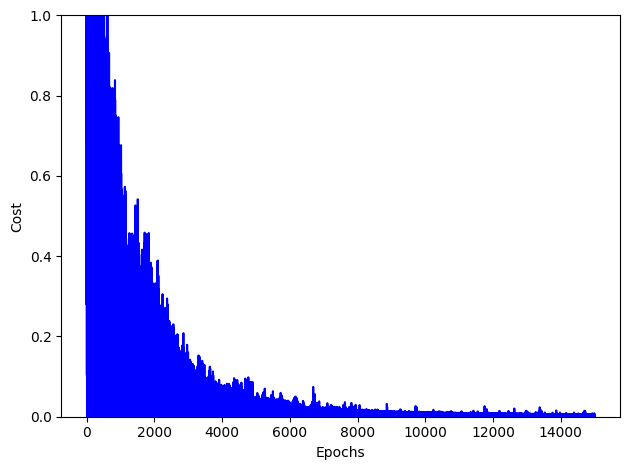

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1.0/(1.0 + np.exp(-x))

def sigmoid_derivada(x):
  return sigmoid(x)*(1.0 - sigmoid(x))

def tanh(x):
  return np.tanh(x)

def tanh_derivada(x):
  return 1.0 - x**2

class NeuralNetwork:

    def __init__(self, layers, activation='tanh'):
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_prime = sigmoid_derivada
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_prime = tanh_derivada

        self.weights = []
        self.deltas = []

        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)

        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)

        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)

            error = y[i] - a[-1]
            deltas = [error * self.activation_prime(a[-1])]

            for l in range(len(a) - 2, 0, -1):
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))
            self.deltas.append(deltas)

            deltas.reverse()

            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)

            if k % 10000 == 0: print('epochs: ', k )

    def predict(self, x):
        ones = np.atleast_2d(np.ones(x.shape[0]))
        a = np.concatenate((np.ones(1).T, np.array(x)), axis=0)
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

    def print_weights(self):
        print("LISTADO PESOS DE CONEXIONES")
        for i in range(len(self.weights)):
            print(self.weights[i])

    def get_deltas(self):
        return self.deltas

nn = NeuralNetwork([2,3,2],activation='tanh')
X = np.array([[0, 0],
              [0, 1],
              [0,-1],
              [0.5, 1],
              [0.5,-1],
              [1, 1],
              [1,-1]
])

y = np.array([[0, 1],
              [0, 1],
              [0, 1],
              [-1, 1],
              [1, 1],
              [0,-1],
              [0, -1]
])
nn.fit(X, y, learning_rate=0.03, epochs=15001)
index = 0
for e in X:
    print ("X: ", e, " y: ", y[index], " Network: ", nn.predict(e))
    index = index+1
#Graficas
deltas = nn.get_deltas()
valores=[]
index=0
for arreglo in deltas:
    valores.append(arreglo[1][0] + arreglo[1][1])
    index=index+1

plt.plot(range(len(valores)), valores, color='b')
plt.ylim([0, 1])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()